<a href="https://colab.research.google.com/github/bommojuvishu/stocksgraphcomp/blob/main/stock_graph_comp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Comparing the stocks that are max linear graphs**

In [199]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [200]:
import yfinance as yf
import numpy as np
import datetime as dt
import pandas as pd
import datetime
import os
import traceback
import matplotlib.pyplot as plt
import json
import logging 



In [201]:
def min_max(data):
  max_x = max(data)
  min_x = min(data)
  result = []
  for x in data:
    x = x - min_x
    result.append(x/ (max_x - min_x))
    
  return result

def plotgraph(df , name):
  
  plt.figure(figsize=(9,4))
  plt.plot(df.index, df['minmax'])
  # best fit in orange
  plt.plot(df.index, df['expected'])
  plt.title(name)
  plt.show


def createList(df):
  # interval = 1/(len(df))
  # result =np.arange(0, 1, interval)

  # if len(result) != len(df):
  #   lastElementIndex = len(result)-1
  #   result = result[:lastElementIndex]

  # return result
  return np.linspace(0,1,len(df))

def computeCloud (data):
    if data.Close > data.MovingAVG:
        return 1
    
    return 0

def returnpercent(arr , nodays ):
  result ={}
  TODAY = dt.datetime.today().strftime('%Y-%m-%d')
  datetime_object = dt.datetime.strptime(TODAY, '%Y-%m-%d')
  for name in arr:
    ohlcv = yf.download(name +'.NS',datetime_object -dt.timedelta(nodays),datetime_object)
    openprice = ohlcv.iloc[0]['Open']
    closeprice = ohlcv.iloc[len(ohlcv) -1 ]['Close']
    x = closeprice -openprice
    perrtr = (x/openprice) *100
    result[name] = perrtr
  print(result)

  return sum(result.values())

def graphfit(ohclv):  
  x_data =x_values = np.linspace(0,1,len(ohlcv))

  y_data =ohlcv['Close'].to_numpy()

  ylog_data = np.log(y_data)

  curve_fit = np.polyfit(x_data, ylog_data, 1)
  a , b  =curve_fit

  y = np.exp(b) * np.exp(a*x_data)
  scaled_y =  min_max(y)
  return scaled_y
  # plt.plot(x_data, y_data)

  # # best fit in orange
  # plt.plot(x_data, y)

In [202]:
#nifty 50
liststocks =["HINDALCO","JSWSTEEL","CIPLA","INFY","TATASTEEL","NESTLEIND","APOLLOHOSP","DRREDDY","DIVISLAB","WIPRO","ULTRACEMCO","SUNPHARMA","ASIANPAINT","HCLTECH","TECHM","ADANIPORTS","LT","UPL","ITC","BAJFINANCE","TCS","HDFCBANK","ONGC","TATAMOTORS","GRASIM","HEROMOTOCO","EICHERMOT","BAJAJFINSV","BPCL","HINDUNILVR","INDUSINDBK","HDFCLIFE","AXISBANK","M&M","HDFC","ICICIBANK","BAJAJ-AUTO","BRITANNIA","SHREECEM","TITAN","POWERGRID","SBILIFE","KOTAKBANK","BHARTIARTL","MARUTI","RELIANCE","SBIN","COALINDIA","NTPC","TATACONSUM"]

In [203]:
#nifty 500
liststocks = ["3MINDIA","ABB","ACC","AIAENG","APLAPOLLO","AUBANK","AARTIDRUGS","AARTIIND","AAVAS","ABBOTINDIA","ADANIENT","ADANIGREEN","ADANIPORTS","ATGL","ADANITRANS","ABCAPITAL","ABFRL","ADVENZYMES","AEGISCHEM","AFFLE","AJANTPHARM","ALEMBICLTD","APLLTD","ALKEM","ALKYLAMINE","ALOKINDS","AMARAJABAT","AMBER","AMBUJACEM","ANGELONE","ANURAS","APOLLOHOSP","APOLLOTYRE","ASAHIINDIA","ASHOKLEY","ASHOKA","ASIANPAINT","ASTERDM","ASTRAZEN","ASTRAL","ATUL","AUROPHARMA","AVANTIFEED","DMART","AXISBANK","BASF","BEML","BSE","BAJAJ-AUTO","BAJAJCON","BAJAJELEC","BAJFINANCE","BAJAJFINSV","BAJAJHLDNG","BALAMINES","BALKRISIND","BALRAMCHIN","BANDHANBNK","BANKBARODA","BANKINDIA","MAHABANK","BATAINDIA","BAYERCROP","BERGEPAINT","BDL","BEL","BHARATFORG","BHEL","BPCL","BHARATRAS","BHARTIARTL","BIOCON","BIRLACORPN","BSOFT","BLUEDART","BLUESTARCO","BBTC","BOSCHLTD","BRIGADE","BRITANNIA","CCL","CESC","CGPOWER","CRISIL","CSBBANK","CADILAHC","CANFINHOME","CANBK","CAPLIPOINT","CGCL","CARBORUNIV","CASTROLIND","CEATLTD","CENTRALBK","CDSL","CENTURYPLY","CENTURYTEX","CERA","CHALET","CHAMBLFERT","CHOLAHLDNG","CHOLAFIN","CIPLA","CUB","COALINDIA","COCHINSHIP","COFORGE","COLPAL","CAMS","CONCOR","COROMANDEL","CREDITACC","CROMPTON","CUMMINSIND","CYIENT","DCBBANK","DCMSHRIRAM","DLF","DABUR","DALBHARAT","DEEPAKNTR","DELTACORP","DHANI","DHANUKA","DBL","DIVISLAB","DIXON","LALPATHLAB","DRREDDY","EIDPARRY","EIHOTEL","EPL","EDELWEISS","EICHERMOT","ELGIEQUIP","EMAMILTD","ENDURANCE","ENGINERSIN","EQUITAS","EQUITASBNK","ERIS","ESCORTS","EXIDEIND","FDC","FEDERALBNK","FACT","FINEORG","FINCABLES","FINPIPE","FSL","FORTIS","FRETAIL","GAIL","GMMPFAUDLR","GALAXYSURF","GARFIBRES","GICRE","GILLETTE","GLAND","GLAXO","GLENMARK","GODFRYPHLP","GODREJAGRO","GODREJCP","GODREJIND","GODREJPROP","GRANULES","GRAPHITE","GRASIM","GESHIP","GREAVESCOT","GRINDWELL","GUJALKALI","GAEL","FLUOROCHEM","GUJGASLTD","GNFC","GPPL","GSFC","GSPL","HEG","HCLTECH","HDFCAMC","HDFCBANK","HDFCLIFE","HFCL","HAPPSTMNDS","HATHWAY","HATSUN","HAVELLS","HEIDELBERG","HEMIPROP","HEROMOTOCO","HIKAL","HINDALCO","HGS","HAL","HINDCOPPER","HINDPETRO","HINDUNILVR","HINDZINC","POWERINDIA","HOMEFIRST","HONAUT","HUDCO","HDFC","ICICIBANK","ICICIGI","ICICIPRULI","ISEC","IDBI","IDFCFIRSTB","IDFC","IFBIND","IIFL","IIFLWAM","IOLCP","IRB","IRCON","ITC","ITI","INDIACEM","IBULHSGFIN","IBREALEST","INDIAMART","INDIANB","IEX","INDHOTEL","IOC","IOB","IRCTC","IRFC","INDIGOPNTS","ICIL","INDOCO","IGL","INDUSTOWER","INDUSINDBK","INFIBEAM","NAUKRI","INFY","INGERRAND","INOXLEISUR","INTELLECT","INDIGO","IPCALAB","JBCHEPHARM","JKCEMENT","JKLAKSHMI","JKPAPER","JKTYRE","JMFINANCIL","JSWENERGY","JSWSTEEL","JAMNAAUTO","JINDALSAW","JSLHISAR","JSL","JINDALSTEL","JCHAC","JUBLFOOD","JUBLINGREA","JUBLPHARMA","JUSTDIAL","JYOTHYLAB","KPRMILL","KEI","KNRCON","KPITTECH","KRBL","KSB","KAJARIACER","KALPATPOWR","KALYANKJIL","KANSAINER","KARURVYSYA","KSCL","KEC","KOTAKBANK","L&TFH","LTTS","LICHSGFIN","LAOPALA","LAXMIMACH","LTI","LT","LAURUSLABS","LXCHEM","LEMONTREE","LINDEINDIA","LUPIN","LUXIND","MMTC","MOIL","MRF","LODHA","MGL","M&MFIN","M&M","MAHINDCIE","MHRIL","MAHLOG","MANAPPURAM","MRPL","MARICO","MARUTI","MASTEK","MFSL","MAXHEALTH","MAZDOCK","METROPOLIS","MINDTREE","MINDACORP","MINDAIND","MIDHANI","MOTILALOFS","MPHASIS","MCX","MUTHOOTFIN","NATCOPHARM","NBCC","NCC","NESCO","NHPC","NLCINDIA","NMDC","NOCIL","NTPC","NH","NATIONALUM","NFL","NAVINFLUOR","NAZARA","NESTLEIND","NETWORK18","NILKAMAL","NAM-INDIA","OBEROIRLTY","ONGC","OIL","OFSS","ORIENTELEC","PCBL","PIIND","PNBHOUSING","PNCINFRA","PVR","PAGEIND","PERSISTENT","PETRONET","PFIZER","PHOENIXLTD","PIDILITIND","PEL","POLYMED","POLYCAB","POLYPLEX","POONAWALLA","PFC","POWERGRID","PRAJIND","PRESTIGE","PRINCEPIPE","PRSMJOHNSN","PGHL","PGHH","PNB","QUESS","RBLBANK","RECLTD","RHIM","RITES","RADICO","RVNL","RAILTEL","RAIN","RAJESHEXPO","RALLIS","RCF","RATNAMANI","REDINGTON","RELAXO","RELIANCE","RBA","ROSSARI","ROUTE","SBICARD","SBILIFE","SIS","SJVN","SKFINDIA","SRF","SANOFI","SCHAEFFLER","SCHNEIDER","SEQUENT","SHARDACROP","SFL","SHILPAMED","SCI","SHREECEM","SHRIRAMCIT","SRTRANSFIN","SIEMENS","SOBHA","SOLARINDS","SOLARA","SONACOMS","SONATSOFTW","SPANDANA","SPICEJET","STARCEMENT","SBIN","SAIL","SWSOLAR","STLTECH","STAR","SUDARSCHEM","SUMICHEM","SPARC","SUNPHARMA","SUNTV","SUNDARMFIN","SUNDRMFAST","SUNTECK","SUPRAJIT","SUPREMEIND","SUPPETRO","SUVENPHAR","SUZLON","SYMPHONY","SYNGENE","TCIEXP","TCNSBRANDS","TTKPRESTIG","TV18BRDCST","TVSMOTOR","TANLA","TASTYBITE","TATACHEM","TATACOFFEE","TATACOMM","TCS","TATACONSUM","TATAELXSI","TATAMTRDVR","TATAMOTORS","TATAPOWER","TATASTLLP","TATASTEEL","TTML","TEAMLEASE","TECHM","NIACL","RAMCOCEM","THERMAX","THYROCARE","TIMKEN","TITAN","TORNTPHARM","TORNTPOWER","TRENT","TRIDENT","TRITURBINE","TIINDIA","UCOBANK","UFLEX","UPL","UTIAMC","UJJIVAN","UJJIVANSFB","ULTRACEMCO","UNIONBANK","UBL","MCDOWELL-N","VGUARD","VMART","VIPIND","VAIBHAVGBL","VAKRANGEE","VALIANTORG","VTL","VARROC","VBL","VEDL","VENKEYS","VINATIORGA","IDEA","VOLTAS","WABCOINDIA","WELCORP","WELSPUNIND","WESTLIFE","WHIRLPOOL","WIPRO","WOCKPHARMA","YESBANK","ZEEL","ZENSARTECH","ZYDUSWELL","ECLERX"]

In [204]:
# liststocks = ['PERSISTENT','INFY','M&M','VBL']
tickers={}

daterange = 7
periodinput = 365
TODAY = "2022-01-01"
TODAY = dt.datetime.today().strftime('%Y-%m-%d')
datetime_object = dt.datetime.strptime(TODAY, '%Y-%m-%d')

count=0
for name in liststocks: 
    try:
        finalresult = []
        count = count +1
        i=0
        flag =False
        print(count,name)
        ohlcv = yf.download(name +'.NS',datetime_object -dt.timedelta(periodinput),datetime_object)
    
        ohlcv['minmax']=min_max(ohlcv['Close'].values)
        print("MATCH:",len(ohlcv), len(createList(ohlcv)))
        ohlcv['expected'] = graphfit(ohlcv)
        # ohlcv['result'] = ohlcv.apply(lambda x: (x['expected'] - x['minmax']) if x['expected'] > x['minmax']  else 0 , axis=1)
        ohlcv['result'] = ohlcv.apply(lambda x: (x['expected'] - x['minmax']) , axis=1)
        ohlcv['result'] = ohlcv['result'].abs()

        if ohlcv['expected'].values[0] == 1:
          flag=True

        finalresult.append(sum(ohlcv['result']))
   
        if flag:
          tickers[name] = [100000]
        else:
          tickers[name] = finalresult
    
    except Exception as ex:
        print(ex)#raised if `y` is empty.
        print("ERROR: ", name)
        liststocks.remove(name)
        traceback.print_exc()
        

df=pd.DataFrame.from_dict(tickers,orient='index')
df = df.reset_index()
df

1 3MINDIA
[*********************100%***********************]  1 of 1 completed
MATCH: 248 248
2 ABB
[*********************100%***********************]  1 of 1 completed
MATCH: 248 248
3 ACC
[*********************100%***********************]  1 of 1 completed
MATCH: 248 248
4 AIAENG
[*********************100%***********************]  1 of 1 completed
MATCH: 248 248
5 APLAPOLLO
[*********************100%***********************]  1 of 1 completed
MATCH: 248 248
6 AUBANK
[*********************100%***********************]  1 of 1 completed
MATCH: 248 248
7 AARTIDRUGS
[*********************100%***********************]  1 of 1 completed
MATCH: 248 248
8 AARTIIND
[*********************100%***********************]  1 of 1 completed
MATCH: 248 248
9 AAVAS
[*********************100%***********************]  1 of 1 completed
MATCH: 248 248
10 ABBOTINDIA
[*********************100%***********************]  1 of 1 completed
MATCH: 248 248
11 ADANIENT
[*********************100%***********************]

Traceback (most recent call last):
  File "<ipython-input-204-907c49251ae3>", line 20, in <module>
    ohlcv['minmax']=min_max(ohlcv['Close'].values)
  File "<ipython-input-201-1710472540f4>", line 2, in min_max
    max_x = max(data)
ValueError: max() arg is an empty sequence


[*********************100%***********************]  1 of 1 completed
MATCH: 248 248
88 CAPLIPOINT
[*********************100%***********************]  1 of 1 completed
MATCH: 248 248
89 CGCL
[*********************100%***********************]  1 of 1 completed
MATCH: 248 248
90 CARBORUNIV
[*********************100%***********************]  1 of 1 completed
MATCH: 248 248
91 CASTROLIND
[*********************100%***********************]  1 of 1 completed
MATCH: 248 248
92 CEATLTD
[*********************100%***********************]  1 of 1 completed
MATCH: 248 248
93 CENTRALBK
[*********************100%***********************]  1 of 1 completed
MATCH: 248 248
94 CDSL
[*********************100%***********************]  1 of 1 completed
MATCH: 248 248
95 CENTURYPLY
[*********************100%***********************]  1 of 1 completed
MATCH: 248 248
96 CENTURYTEX
[*********************100%***********************]  1 of 1 completed
MATCH: 248 248
97 CERA
[*********************100%****************

Traceback (most recent call last):
  File "<ipython-input-204-907c49251ae3>", line 20, in <module>
    ohlcv['minmax']=min_max(ohlcv['Close'].values)
  File "<ipython-input-201-1710472540f4>", line 2, in min_max
    max_x = max(data)
ValueError: max() arg is an empty sequence


[*********************100%***********************]  1 of 1 completed
MATCH: 248 248
430 SYNGENE
[*********************100%***********************]  1 of 1 completed
MATCH: 248 248
431 TCIEXP
[*********************100%***********************]  1 of 1 completed
MATCH: 248 248
432 TCNSBRANDS
[*********************100%***********************]  1 of 1 completed
MATCH: 248 248
433 TTKPRESTIG
[*********************100%***********************]  1 of 1 completed
MATCH: 248 248
434 TV18BRDCST
[*********************100%***********************]  1 of 1 completed
MATCH: 248 248
435 TVSMOTOR
[*********************100%***********************]  1 of 1 completed
MATCH: 248 248
436 TANLA
[*********************100%***********************]  1 of 1 completed
MATCH: 248 248
437 TASTYBITE
[*********************100%***********************]  1 of 1 completed
MATCH: 248 248
438 TATACHEM
[*********************100%***********************]  1 of 1 completed
MATCH: 248 248
439 TATACOFFEE
[*********************100%*

Traceback (most recent call last):
  File "<ipython-input-204-907c49251ae3>", line 20, in <module>
    ohlcv['minmax']=min_max(ohlcv['Close'].values)
  File "<ipython-input-201-1710472540f4>", line 2, in min_max
    max_x = max(data)
ValueError: max() arg is an empty sequence


[*********************100%***********************]  1 of 1 completed
MATCH: 248 248
491 WHIRLPOOL
[*********************100%***********************]  1 of 1 completed
MATCH: 248 248
492 WIPRO
[*********************100%***********************]  1 of 1 completed
MATCH: 248 248
493 WOCKPHARMA
[*********************100%***********************]  1 of 1 completed
MATCH: 248 248
494 YESBANK
[*********************100%***********************]  1 of 1 completed
MATCH: 248 248
495 ZEEL
[*********************100%***********************]  1 of 1 completed
MATCH: 248 248
496 ZENSARTECH
[*********************100%***********************]  1 of 1 completed
MATCH: 248 248
497 ZYDUSWELL
[*********************100%***********************]  1 of 1 completed
MATCH: 248 248
498 ECLERX
[*********************100%***********************]  1 of 1 completed
MATCH: 249 249


,index,0
0,3MINDIA,100000.000000
1,ABB,37.769259
2,ACC,100000.000000
3,AIAENG,60.363832
4,APLAPOLLO,62.066222
...,...,...
490,YESBANK,53.883460
491,ZEEL,100000.000000
492,ZENSARTECH,100000.000000
493,ZYDUSWELL,100000.000000


In [205]:
df.sort_values(by=[0])

,index,0
13,ATGL,23.141483
96,CHALET,27.643015
172,FLUOROCHEM,28.214856
240,INOXLEISUR,29.487445
286,LEMONTREE,29.492104
...,...,...
194,HAL,NaN
317,NATCOPHARM,NaN
357,POWERGRID,NaN
418,SUNPHARMA,NaN


[*********************100%***********************]  1 of 1 completed
ATGL
[*********************100%***********************]  1 of 1 completed
CHALET
[*********************100%***********************]  1 of 1 completed
FLUOROCHEM
[*********************100%***********************]  1 of 1 completed
INOXLEISUR
[*********************100%***********************]  1 of 1 completed
LEMONTREE
[*********************100%***********************]  1 of 1 completed
TATAELXSI
[*********************100%***********************]  1 of 1 completed
BDL
[*********************100%***********************]  1 of 1 completed
ADANITRANS
[*********************100%***********************]  1 of 1 completed
CGCL
[*********************100%***********************]  1 of 1 completed
INGERRAND
[*********************100%***********************]  1 of 1 completed
SCHAEFFLER
[*********************100%***********************]  1 of 1 completed
ELGIEQUIP
[*********************100%***********************]  1 of 1 complete

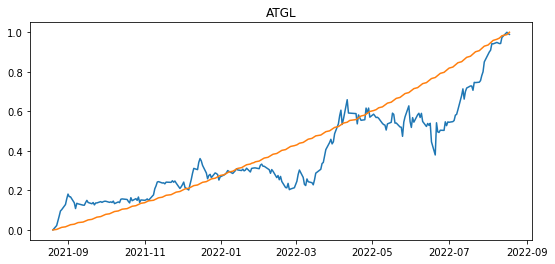

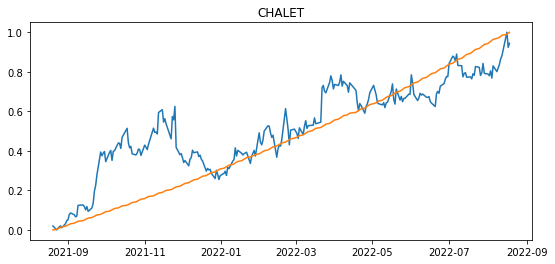

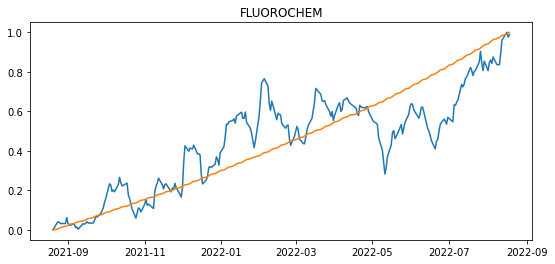

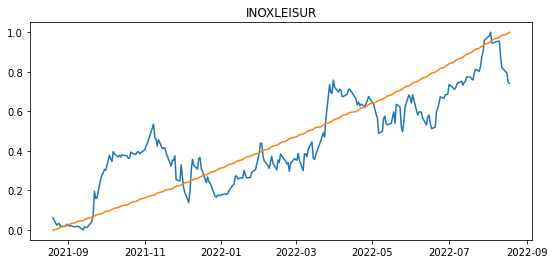

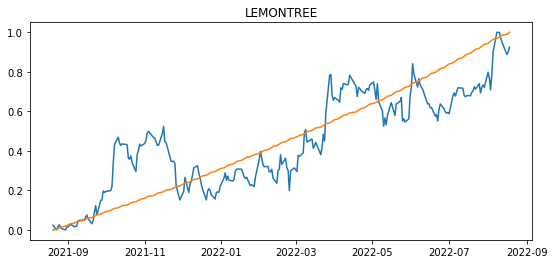

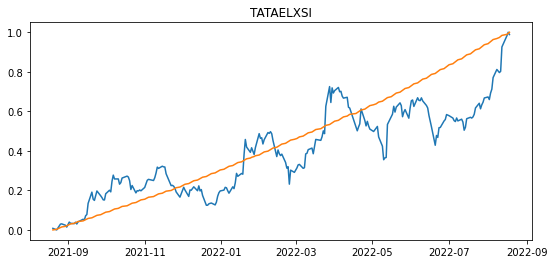

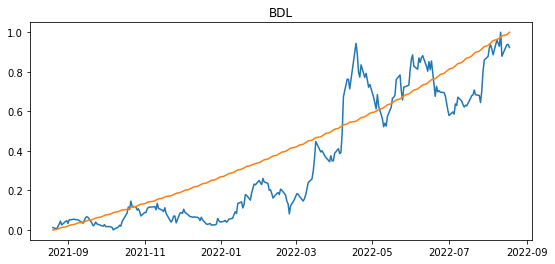

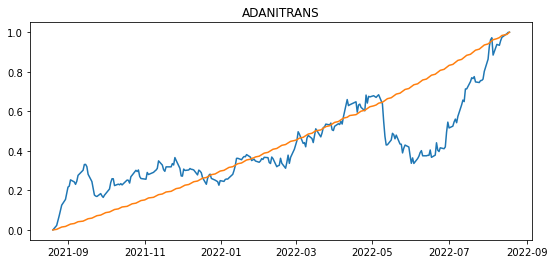

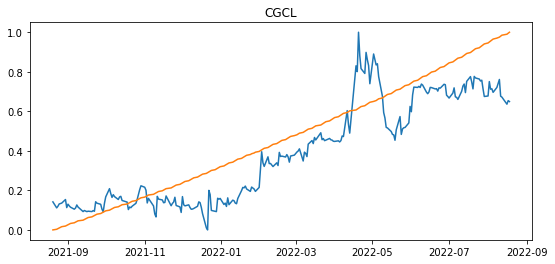

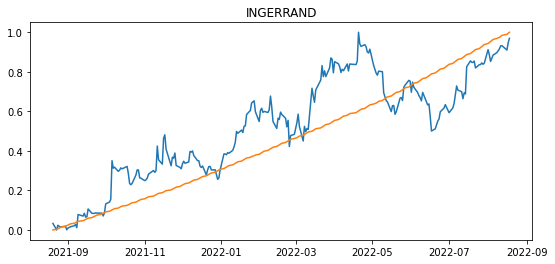

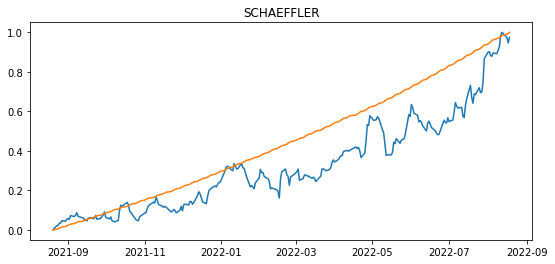

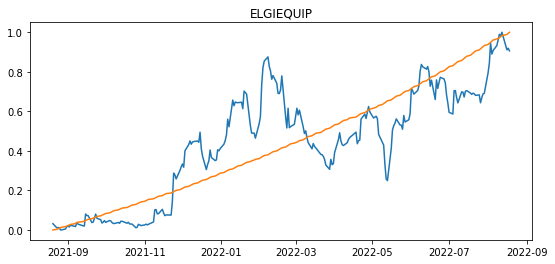

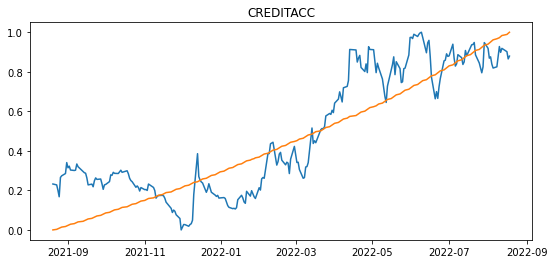

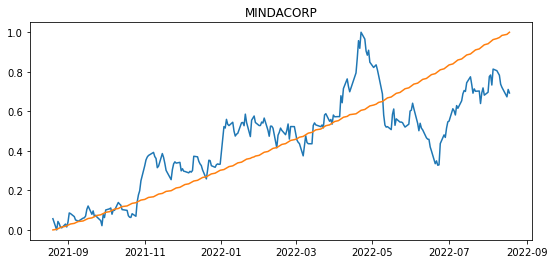

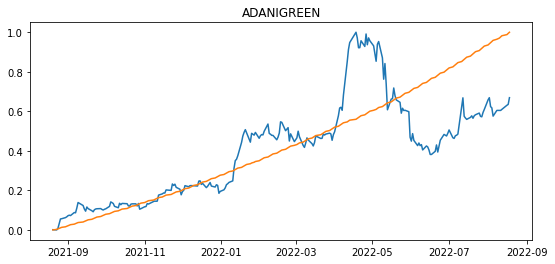

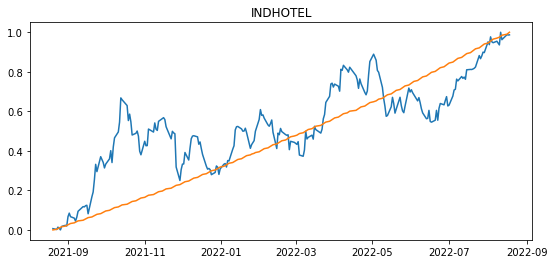

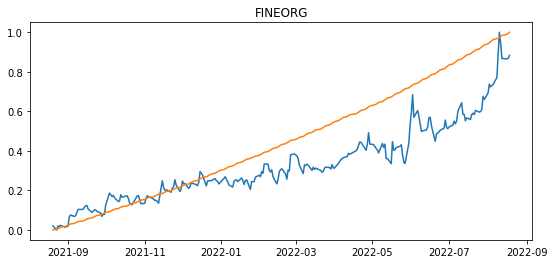

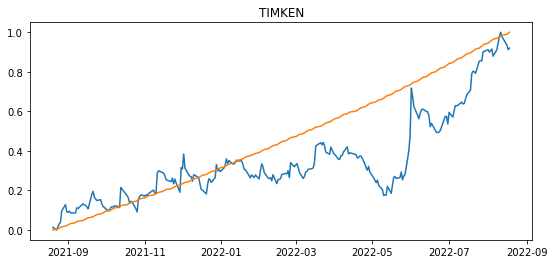

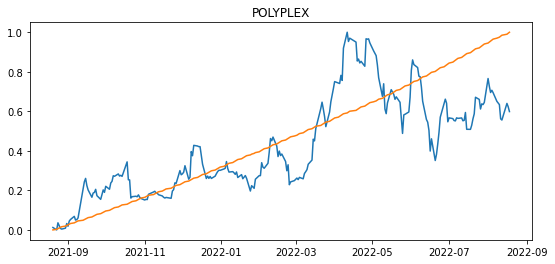

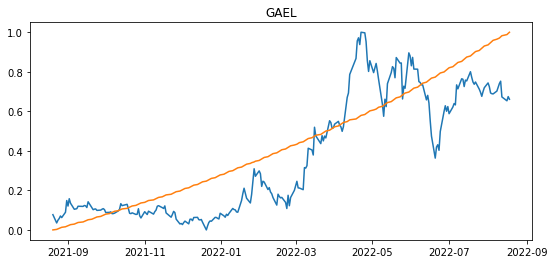

In [209]:
top10 = df.sort_values(by=[0]).head(20)
topnames = top10['index'].values
# topnames=['VBL','ATGL']
for name in topnames: 
    try:
          
        ohlcv = yf.download(name +'.NS',datetime_object -dt.timedelta(periodinput),datetime_object)
        ohlcv['minmax']=min_max(ohlcv['Close'].values)
        
        ohlcv['expected'] =  graphfit(ohlcv)

        ohlcv['result'] = ohlcv.apply(lambda x: (x['minmax'] - x['expected'] ) , axis=1)
        
        print(name) 
        colname = 'Close'
        plotgraph(ohlcv, name)
        # colname = 'expected'
        # plotgraph(ohlcv, colname)
        
        
    
    except Exception as ex:
        print(ex)#raised if  is empty.
        print("ERROR: ", name)
   
        traceback.print_exc()

In [207]:
print(topnames)
returnpercent(topnames, daterange)

['VBL', 'ATGL']
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
{'VBL': 3.572141732742537, 'ATGL': 3.4747549694689273}


7.046896702211464

In [208]:
ohlcv

,Open,High,Low,Close,Adj Close,Volume,minmax,expected,result
Date,,,,,,,,,
2021-08-20,1072.849976,1072.849976,1042.250000,1072.849976,1072.749634,151112,0.000000,0.000000,0.000000
2021-08-23,1126.000000,1126.449951,1084.000000,1126.449951,1126.344482,208476,0.022178,0.002587,0.019590
2021-08-24,1182.000000,1182.750000,1170.000000,1182.750000,1182.639282,121447,0.045472,0.005183,0.040289
2021-08-25,1241.849976,1241.849976,1241.849976,1241.849976,1241.733765,118696,0.069926,0.007788,0.062138
2021-08-26,1303.900024,1303.900024,1266.699951,1303.900024,1303.777954,627956,0.095600,0.010402,0.085198
...,...,...,...,...,...,...,...,...,...
2022-08-11,3362.000000,3399.300049,3309.000000,3352.300049,3352.300049,473134,0.943149,0.976220,-0.033071
2022-08-12,3347.000000,3439.800049,3338.350098,3425.399902,3425.399902,453978,0.973395,0.982135,-0.008740
2022-08-16,3438.300049,3498.000000,3415.399902,3489.699951,3489.699951,230770,1.000000,0.988070,0.011930
